# Miguel Suarez
## 10/19/2023


In [ ]:
import numpy as np

In [ ]:
# Generate random data for demonstration
TRUE_SLOPE = 2
TRUE_INTERCEPT = 1
RAND_SCALE = 0.1
RAND_SEED = 0
np.random.seed(RAND_SEED)
X = np.random.rand(100, 1)  # Feature (input)
#sort so graphs come out better
y = TRUE_SLOPE * X + TRUE_INTERCEPT + RAND_SCALE * np.random.randn(100, 1)  # Target variable (output) with some noise


In [ ]:
# Split the data into training (80%) and testing (20%) sets
test_start_index = int(0.8 * len(X)) #from 80% index to 100% index (20% total) for testing
X_train = X[:test_start_index]
X_test = X[test_start_index:]
y_train = y[:test_start_index]
y_test = y[test_start_index:]

#Start your code below here

In [ ]:
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score

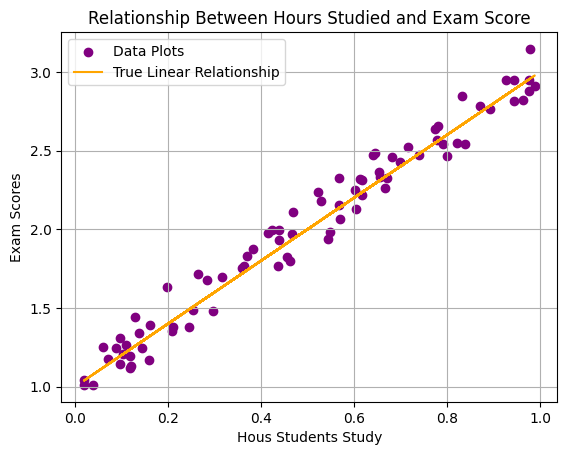

In [ ]:
plt.scatter(X_train, y_train, color= "purple", label='Data Plots')

actual_y = TRUE_SLOPE * X_train + TRUE_INTERCEPT
plt.plot(X_train, actual_y, color='orange',
         label='True Linear Relationship')

plt.xlabel('Hous Students Study')
plt.ylabel('Exam Scores')
plt.legend()
plt.title('Relationship Between Hours Studied and Exam Score')
plt.grid(True)
plt.show()


In [ ]:
LEARNING_RATE = 0.75
EPOCHS = 100
EARLY_STOP = True
COST_THRESHOLD = 1e-5

# Initialized Weights and Bias
w = 0.0
b = 0.0
prev_cost = float('inf')
cost_history = []

# Data for tratining
X = X_train
y = y_train
m = len(X)

# To measure time
start_time = time.time()

for epoch in range(EPOCHS):

  # I Vectorized operations instead of having an extra for loop
  errors = w*X + b - y

  cost = np.sum(errors**2) / (2*m)

  # Aligned dimensions for dot product by transposing X, because doing a dot product # columns (features) must = # rows
  w_gradient = np.dot(X.T, errors) / m

  b_gradient = np.sum(errors) / m

  # Updated weights and bias
  w -= LEARNING_RATE * w_gradient
  b -= LEARNING_RATE * b_gradient

  # Tracked the cost
  cost_history.append(cost)

  # Had early stopping in case there was any need to stop before
  if EARLY_STOP and abs(prev_cost - cost) < COST_THRESHOLD:
    break

  prev_cost = cost

# Timing calculations at the end
end_time = time.time()
training_time = end_time - start_time

# Calculating MSE and R2 using Sklearn library
y_pred = w*X + b
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
y_test = w * X_test + b

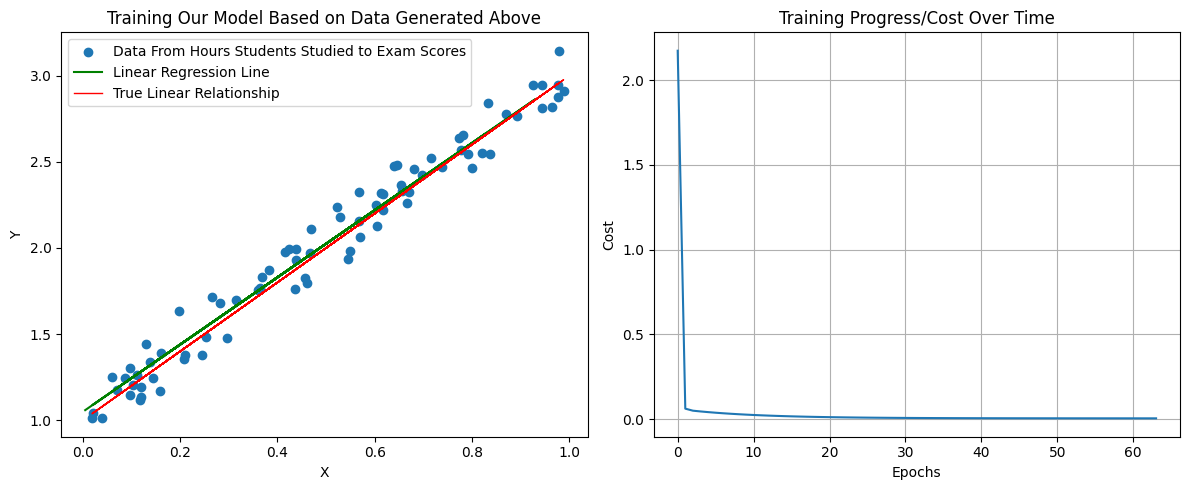

True Slope (m): 2  Model Slope (w): [[1.95085122]]
True Intercept (b): 1 Model Intercept (b): 1.049283249790501
Training Time: 0.00 seconds
MSE 0.01
R2:0.97


In [ ]:
#First Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Data From Hours Students Studied to Exam Scores')
plt.plot(X_test, y_test, color='green', label='Linear Regression Line')
plt.plot(X_train, actual_y, color='red', linewidth=1, label='True Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Training Our Model Based on Data Generated Above')

#Second for plot history
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Progress/Cost Over Time')
plt.grid(True)

plt.tight_layout()
plt.show()
print("True Slope (m):", TRUE_SLOPE, " Model Slope (w):", w)
print("True Intercept (b):", TRUE_INTERCEPT, "Model Intercept (b):", b)
print(f"Training Time: {training_time:.2f} seconds")
print(f"MSE {mse:.2f}")
print(f"R2:{r2:.2f}")

*Where would the data lie in the scatterplot for a student who was either a genius or had extensive prior experience with the subject? If a few students like this were in your dataset, how would it impact your linear regression model and its predictions?*

##### This would impact my data set because it would cause there to be less hours studied in comparison to exam scores for certain data points. Consequently, it would appear that students who studied less actually had better scores or would mess up the linear regression. The predictions could be less accurate when examining a larger dataset.

*Where would the data lie in the scatterplot for a student who tried hard but struggled to perform well in the subject? If a few students like this were in your dataset, how would it impact your linear regression model and its predictions?*

##### This would cause the data to show that as students study more hours, the test scores would not reflect their effort. Potentially, this could show that there is a low correlation between studying more hours and higher test scores. The predictions could be inaccurate and the regression model might take more iterations to converge

*If there were several outlier cases in your training dataset, how should you handle them to maximize model accuracy?*

##### I would attempt to either exclude or remove them. I would use some form of anomaly detection function that would allow me to see what data points are great outliers. Furthermore, collecting more data could help me try to substitute these data points